In [1]:
import pandas as pd

# pandas series

In [5]:
ser = pd.Series(data=[100,'foo',300,400,500], index=[666, 'bob', 'nancy', 'dan', 'eric'])
ser

666      100
bob      foo
nancy    300
dan      400
eric     500
dtype: object

In [4]:
ser.index

Index(['tom', 'bob', 'nancy', 'dan', 'eric'], dtype='object')

In [8]:
ser['bob']

'foo'

In [9]:
ser[['bob', 'nancy']]

bob      foo
nancy    300
dtype: object

In [10]:
ser[[1,3]]

bob    foo
dan    400
dtype: object

In [11]:
ser.iloc[2]

300

In [12]:
'bob' in ser

True

In [13]:
ser * 2

666         200
bob      foofoo
nancy       600
dan         800
eric       1000
dtype: object

In [14]:
ser[['nancy', 'eric']] ** 2

nancy     90000
eric     250000
dtype: object

# pandas data frames

In [16]:
d = {'col_one': pd.Series([100,200,300], ['apple', 'orange', 'banana']),
    'col_two' : pd.Series([111,222,333,444], ['apple', 'ball', 'clock', 'water'])}

In [17]:
df = pd.DataFrame(d)
print(df)

        col_one  col_two
apple     100.0    111.0
ball        NaN    222.0
banana    300.0      NaN
clock       NaN    333.0
orange    200.0      NaN
water       NaN    444.0


In [18]:
df.index

Index(['apple', 'ball', 'banana', 'clock', 'orange', 'water'], dtype='object')

In [19]:
df.columns

Index(['col_one', 'col_two'], dtype='object')

In [20]:
pd.DataFrame(d, index = ['apple', 'ball', 'orange'])

,col_one,col_two
apple,100.0,111.0
ball,NaN,222.0
orange,200.0,NaN


In [22]:
pd.DataFrame(d, index = ['apple', 'ball', 'orange'], columns = ['col_two', 'five'])

,col_two,five
apple,111.0,NaN
ball,222.0,NaN
orange,NaN,NaN


## create data frame from list of python dict

In [23]:
data = [{'alex': 1, 'joe': 2}, {'ema': 5, 'dora': 10, 'alice': 20}]

In [25]:
df2 = pd.DataFrame(data)
print(df2)

   alex  joe  ema  dora  alice
0   1.0  2.0  NaN   NaN    NaN
1   NaN  NaN  5.0  10.0   20.0


In [27]:
df3 = pd.DataFrame(data, index=['row1', 'row2'])
df3

,alex,joe,ema,dora,alice
row1,1.0,2.0,NaN,NaN,NaN
row2,NaN,NaN,5.0,10.0,20.0


In [30]:
df4 = pd.DataFrame(data, columns=['joe','dora', 'alice'])
df4

,joe,dora,alice
0,2.0,NaN,NaN
1,NaN,10.0,20.0


In [36]:
df['col_one']
# df['apple']
'apple' in df

False

In [43]:
df['col_three'] = df['col_one'] + df['col_two']
df

,col_one,col_two,flag,col_three
apple,100.0,111.0,False,211.0
ball,NaN,222.0,False,NaN
banana,300.0,NaN,False,NaN
clock,NaN,333.0,True,NaN
orange,200.0,NaN,False,NaN
water,NaN,444.0,True,NaN


In [38]:
df['flag'] = df['col_two'] > 300
df

,col_one,col_two,col_three,flag
apple,100.0,111.0,211.0,False
ball,NaN,222.0,NaN,False
banana,300.0,NaN,NaN,False
clock,NaN,333.0,NaN,True
orange,200.0,NaN,NaN,False
water,NaN,444.0,NaN,True


In [44]:
three = df.pop('col_three')
three

apple     211.0
ball        NaN
banana      NaN
clock       NaN
orange      NaN
water       NaN
Name: col_three, dtype: float64

In [45]:
del df['flag']
df

,col_one,col_two
apple,100.0,111.0
ball,NaN,222.0
banana,300.0,NaN
clock,NaN,333.0
orange,200.0,NaN
water,NaN,444.0


In [49]:
df.pop('copy_of_one')
df.insert(0, 'copy_of_one', df['col_one'])
df

,copy_of_one,col_one,col_two
apple,100.0,100.0,111.0
ball,NaN,NaN,222.0
banana,300.0,300.0,NaN
clock,NaN,NaN,333.0
orange,200.0,200.0,NaN
water,NaN,NaN,444.0


In [54]:
df['upper_one'] = df['col_one'][:2]
df

,copy_of_one,col_one,col_two,upper_one
apple,100.0,100.0,111.0,100.0
ball,NaN,NaN,222.0,NaN
banana,300.0,300.0,NaN,NaN
clock,NaN,NaN,333.0,NaN
orange,200.0,200.0,NaN,NaN
water,NaN,NaN,444.0,NaN


# Case study

In [56]:
!cat ./movielens/movies.csv | wc -l

    9743


In [2]:
movies = pd.read_csv('./movielens/movies.csv', sep=',')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
tags = pd.read_csv('./movielens/tags.csv', sep=',')
tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [4]:
ratings = pd.read_csv('./movielens/ratings.csv', sep = ',', parse_dates=['timestamp'])
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [5]:
del ratings['timestamp']
del tags['timestamp']

In [67]:
row0 = tags.iloc[0]
print(row0)

userId         2
movieId    60756
tag        funny
Name: 0, dtype: object


In [75]:
tags.columns
# tags.index
row0['userId']
row0[0]

2

In [76]:
'apple' in row0

False

In [82]:
tags.head()
tags.index
tags.columns

Index(['userId', 'movieId', 'tag'], dtype='object')

In [84]:
tags.iloc[[0,11,200]]

,userId,movieId,tag
0,2,60756,funny
11,18,431,gangster
200,62,60074,bad script


In [85]:
ratings['rating'].describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

# statistics

In [87]:
ratings['rating'].describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

In [89]:
ratings.describe()

,userId,movieId,rating
count,100836.000000,100836.000000,100836.000000
mean,326.127564,19435.295718,3.501557
std,182.618491,35530.987199,1.042529
min,1.000000,1.000000,0.500000
25%,177.000000,1199.000000,3.000000
50%,325.000000,2991.000000,3.500000
75%,477.000000,8122.000000,4.000000
max,610.000000,193609.000000,5.000000


In [90]:
ratings['rating'].mean()

3.501556983616962

In [91]:
ratings.mean()

userId       326.127564
movieId    19435.295718
rating         3.501557
dtype: float64

In [92]:
ratings['rating'].min()

0.5

In [93]:
ratings['rating'].max()

5.0

In [94]:
ratings['rating'].std()

1.0425292390605359

In [95]:
ratings['rating'].mode()

0    4.0
dtype: float64

In [96]:
ratings.corr()

,userId,movieId,rating
userId,1.000000,0.006773,-0.049348
movieId,0.006773,1.000000,-0.004061
rating,-0.049348,-0.004061,1.000000


In [99]:
filter1 = ratings['rating'] > 5
filter1.any()
type(filter1)

pandas.core.series.Series

In [100]:
filter2 = ratings['rating'] > 0
filter2.all()

True

# data cleaning

In [6]:
movies.shape

(9742, 3)

In [9]:
movies.isnull().any()

movieId    False
title      False
genres     False
dtype: bool

In [10]:
ratings.isnull().any()

userId     False
movieId    False
rating     False
dtype: bool

In [14]:
tags.isnull().any()
tags = tags.dropna()

# data visualization

In [15]:
%matplotlib inline

ratings.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8c3d64d750>]],
      dtype=object)

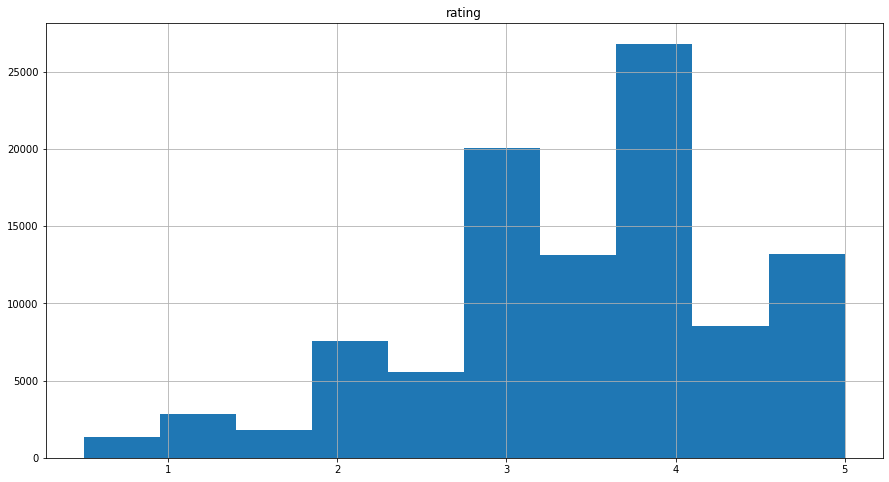

In [18]:
ratings.hist(column='rating', figsize=(15,8))

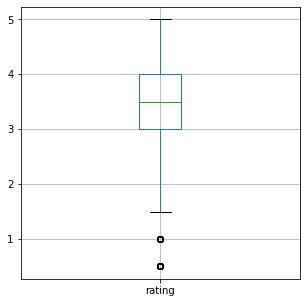

In [22]:
ratings.boxplot(column='rating', figsize=(5,5))

# slicing out columns

In [23]:
tags['tag'].head()

0              funny
1    Highly quotable
2       will ferrell
3       Boxing story
4                MMA
Name: tag, dtype: object

In [24]:
movies[['title', 'genres']].head()

,title,genres
0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,Jumanji (1995),Adventure|Children|Fantasy
2,Grumpier Old Men (1995),Comedy|Romance
3,Waiting to Exhale (1995),Comedy|Drama|Romance
4,Father of the Bride Part II (1995),Comedy


In [25]:
ratings[1000:1010]

,userId,movieId,rating
1000,7,31878,3.5
1001,7,32029,2.0
1002,7,32031,1.5
1003,7,32296,2.0
1004,7,32587,3.5
1005,7,33162,3.5
1006,7,33493,1.0
1007,7,33794,2.0
1008,7,33836,1.0
1009,7,34048,3.0


In [26]:
ratings[-10:]

,userId,movieId,rating
100826,610,162350,3.5
100827,610,163937,3.5
100828,610,163981,3.5
100829,610,164179,5.0
100830,610,166528,4.0
100831,610,166534,4.0
100832,610,168248,5.0
100833,610,168250,5.0
100834,610,168252,5.0
100835,610,170875,3.0


In [27]:
tags['tag']

0                  funny
1        Highly quotable
2           will ferrell
3           Boxing story
4                    MMA
              ...       
3678           for katie
3679             austere
3680              gun fu
3681    heroic bloodshed
3682    Heroic Bloodshed
Name: tag, Length: 3683, dtype: object

In [30]:
tag_count = tags['tag'].value_counts()
tag_count[:10]
tag_count[-10:]

Everything you want is here    1
scifi                          1
multiple roles                 1
Dialogue                       1
animal movie                   1
bruce willis                   1
r:strong bloody violence       1
music industry                 1
a clever chef rat              1
celebrity fetishism            1
Name: tag, dtype: int64

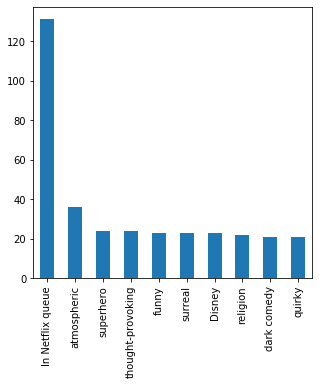

In [32]:
tag_count[:10].plot(kind='bar', figsize=(5,5))

# filtering

In [34]:
is_highly_rated = ratings['rating'] >= 4.0
is_highly_rated

0          True
1          True
2          True
3          True
4          True
          ...  
100831     True
100832     True
100833     True
100834     True
100835    False
Name: rating, Length: 100836, dtype: bool

In [37]:
ratings[is_highly_rated][:10]

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0
6,1,101,5.0
7,1,110,4.0
8,1,151,5.0
9,1,157,5.0
10,1,163,5.0


In [38]:
is_anime = movies['genres'].str.contains('Animation')
movies[is_anime][:5]

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
12,13,Balto (1995),Adventure|Animation|Children
44,48,Pocahontas (1995),Animation|Children|Drama|Musical|Romance
205,239,"Goofy Movie, A (1995)",Animation|Children|Comedy|Romance
272,313,"Swan Princess, The (1994)",Animation|Children


# aggregate

In [40]:
ratings_count = ratings[['movieId', 'rating']].groupby('movieId').count()
ratings_count

,rating
movieId,
1,215
2,110
3,52
4,7
5,49
...,...
193581,1
193583,1
193585,1


In [42]:
avg_count = ratings[['movieId', 'rating']].groupby('movieId').mean()
avg_count.head()

,rating
movieId,
1,3.920930
2,3.431818
3,3.259615
4,2.357143
5,3.071429


# merge dataframes 

In [43]:
tags.columns

Index(['userId', 'movieId', 'tag'], dtype='object')

In [44]:
movies.columns

Index(['movieId', 'title', 'genres'], dtype='object')

In [47]:
merge = pd.merge(tags, movies, how='inner')
merge.head()

,userId,movieId,tag,title,genres
0,2,60756,funny,Step Brothers (2008),Comedy
1,2,60756,Highly quotable,Step Brothers (2008),Comedy
2,2,60756,will ferrell,Step Brothers (2008),Comedy
3,62,60756,comedy,Step Brothers (2008),Comedy
4,62,60756,funny,Step Brothers (2008),Comedy


# Combine exercise

In [58]:
ratings.tail()

,userId,movieId,rating
100831,610,166534,4.0
100832,610,168248,5.0
100833,610,168250,5.0
100834,610,168252,5.0
100835,610,170875,3.0


In [62]:
rate_avg = ratings.groupby('movieId', as_index=False).mean()
del rate_avg['userId']
rate_avg.head(5)

,movieId,rating
0,1,3.920930
1,2,3.431818
2,3,3.259615
3,4,2.357143
4,5,3.071429


In [63]:
box_office = movies.merge(rate_avg, on='movieId', how='inner')
box_office.head()

,movieId,title,genres,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


In [65]:
high_rate = box_office['rating'] >= 4.0
box_office[high_rate].tail()

,movieId,title,genres,rating
9713,191005,Gintama (2017),Action|Adventure|Comedy|Sci-Fi,4.5
9716,193571,Silver Spoon (2014),Comedy|Drama,4.0
9717,193573,Love Live! The School Idol Movie (2015),Animation,4.0
9719,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,4.0
9723,193609,Andrew Dice Clay: Dice Rules (1991),Comedy,4.0


In [66]:
comedy = box_office['genres'].str.contains('Comedy')
box_office[comedy][:5]

,movieId,title,genres,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429
6,7,Sabrina (1995),Comedy|Romance,3.185185


In [67]:
box_office[comedy & high_rate][-5:]

,movieId,title,genres,rating
9708,190209,Jeff Ross Roasts the Border (2017),Comedy,4.0
9713,191005,Gintama (2017),Action|Adventure|Comedy|Sci-Fi,4.5
9716,193571,Silver Spoon (2014),Comedy|Drama,4.0
9719,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,4.0
9723,193609,Andrew Dice Clay: Dice Rules (1991),Comedy,4.0


# String Opt

In [68]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [72]:
genres = movies['genres'].str.split('|', expand=True)

In [73]:
genres

,0,1,2,3,4,5,6,7,8,9
0,Adventure,Animation,Children,Comedy,Fantasy,None,None,None,None,None
1,Adventure,Children,Fantasy,None,None,None,None,None,None,None
2,Comedy,Romance,None,None,None,None,None,None,None,None
3,Comedy,Drama,Romance,None,None,None,None,None,None,None
4,Comedy,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...
9737,Action,Animation,Comedy,Fantasy,None,None,None,None,None,None
9738,Animation,Comedy,Fantasy,None,None,None,None,None,None,None
9739,Drama,None,None,None,None,None,None,None,None,None
9740,Action,Animation,None,None,None,None,None,None,None,None


In [77]:
genres['iscomedy'] = movies['genres'].str.contains('Comedy')

In [78]:
genres

,0,1,2,3,4,5,6,7,8,9,iscomedy
0,Adventure,Animation,Children,Comedy,Fantasy,None,None,None,None,None,True
1,Adventure,Children,Fantasy,None,None,None,None,None,None,None,False
2,Comedy,Romance,None,None,None,None,None,None,None,None,True
3,Comedy,Drama,Romance,None,None,None,None,None,None,None,True
4,Comedy,None,None,None,None,None,None,None,None,None,True
...,...,...,...,...,...,...,...,...,...,...,...
9737,Action,Animation,Comedy,Fantasy,None,None,None,None,None,None,True
9738,Animation,Comedy,Fantasy,None,None,None,None,None,None,None,True
9739,Drama,None,None,None,None,None,None,None,None,None,False
9740,Action,Animation,None,None,None,None,None,None,None,None,False


In [79]:
movies['year'] = movies['title'].str.extract('.*\((.*)\).*', expand=True)

In [80]:
movies

,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995
...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,2017
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,2017
9739,193585,Flint (2017),Drama,2017
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,2018


# timestamps

In [81]:
tags = pd.read_csv('./movielens/tags.csv', sep=',')

In [83]:
tags.dtypes

userId        int64
movieId       int64
tag          object
timestamp     int64
dtype: object

In [85]:
tags['parsed_time'] = pd.to_datetime(tags['timestamp'], unit='s')

In [87]:
tags.dtypes

userId                  int64
movieId                 int64
tag                    object
timestamp               int64
parsed_time    datetime64[ns]
dtype: object

In [93]:
greater = tags['parsed_time'] > '2015-02-01'
tags[greater].shape
tags.shape
tags[greater].head()

,userId,movieId,tag,timestamp,parsed_time
0,2,60756,funny,1445714994,2015-10-24 19:29:54
1,2,60756,Highly quotable,1445714996,2015-10-24 19:29:56
2,2,60756,will ferrell,1445714992,2015-10-24 19:29:52
3,2,89774,Boxing story,1445715207,2015-10-24 19:33:27
4,2,89774,MMA,1445715200,2015-10-24 19:33:20


In [94]:
tags.sort_values(by='parsed_time', ascending=True)

,userId,movieId,tag,timestamp,parsed_time
1756,474,3181,Shakespeare,1137179352,2006-01-13 19:09:12
2212,474,6912,Rita Hayworth can dance!,1137179371,2006-01-13 19:09:31
1636,474,2494,Hungary,1137179426,2006-01-13 19:10:26
1635,474,2494,Holocaust,1137179426,2006-01-13 19:10:26
1497,474,1836,No DVD at Netflix,1137179444,2006-01-13 19:10:44
...,...,...,...,...,...
517,184,5388,insomnia,1537094688,2018-09-16 10:44:48
527,184,193565,anime,1537098582,2018-09-16 11:49:42
528,184,193565,comedy,1537098587,2018-09-16 11:49:47
530,184,193565,remaster,1537098592,2018-09-16 11:49:52


In [95]:
avg_rate = ratings[['movieId', 'rating']].groupby('movieId', as_index = False).mean()
avg_rate

,movieId,rating
0,1,3.920930
1,2,3.431818
2,3,3.259615
3,4,2.357143
4,5,3.071429
...,...,...
9719,193581,4.000000
9720,193583,3.500000
9721,193585,3.500000
9722,193587,3.500000


In [99]:
joined = movies.merge(avg_rate, on='movieId', how='inner')
joined.head()
joined.corr()
joined.head()

,movieId,title,genres,year,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,1995,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995,2.357143
4,5,Father of the Bride Part II (1995),Comedy,1995,3.071429


In [102]:
year_rate = joined[['year', 'rating']].groupby('year', as_index=False).mean()
year_rate

,year,rating
0,1902,3.500000
1,1903,2.500000
2,1908,4.000000
3,1915,2.000000
4,1916,3.562500
...,...,...
102,2014,3.113464
103,2015,3.069094
104,2016,3.103748
105,2017,3.376749


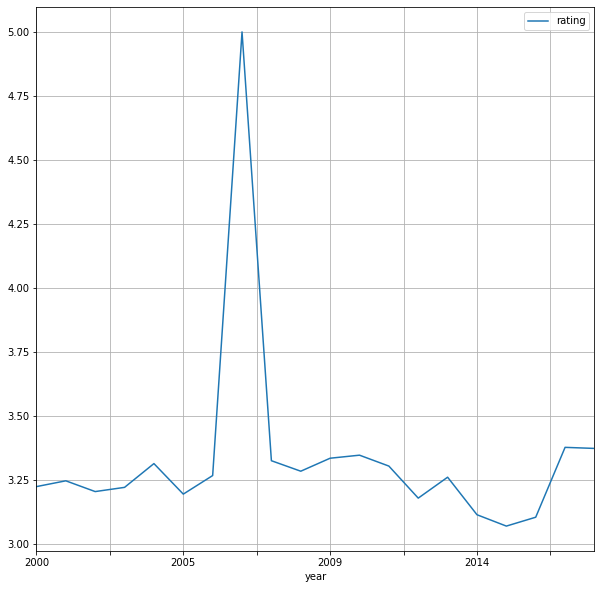

In [104]:
year_rate[-20:].plot(x='year', y='rating', figsize=(10,10), grid=True)